## Convolutional Neural Network (CNN) Implimentation for facial recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Load the facial dataset <i>fetch_lfw_people</i> from sklearn, with a filter that each person has at least 20 images. 

In [2]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20)

Plot first 15 faces in the dataset

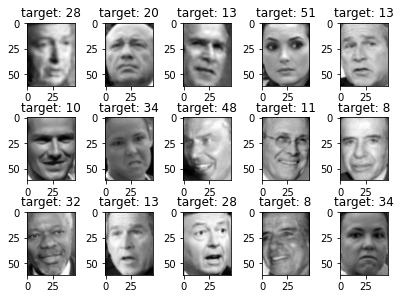

In [3]:
fig, axes = plt.subplots(3, 5)
plt.subplots_adjust(right=1, top=1, hspace=.5)
for i in range(15):
    axes.flat[i].imshow(people['images'][i],cmap='gray')
    axes.flat[i].title.set_text('target: {}'.format(people['target'][i]))
plt.show()

In [4]:
#Size of the data
people['images'].shape

(2749, 62, 47)

In [5]:
#Number of target
len(np.unique(people['target']))

52

The dataset contains 2749 images with size 62\*47 comes from 52 individuals. <br>

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Separate the dataset into training, validation, testing set at a ratio 80%:10%:10%

In [7]:
X=people['images']
y=people['target']

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, train_size=0.8)
X_val, X_test, y_val, y_test = train_test_split(X, y, train_size=0.5)
X_train = X_train.reshape((X_train.shape[0], 62, 47, 1))
X_val = X_val.reshape((X_val.shape[0], 62, 47, 1))
X_test = X_test.reshape((X_test.shape[0], 62, 47, 1))

#Input shape
in_shape = X_train.shape[1:]
#Number of Class
n_classes = len(np.unique(y_train))

### Define CNN Model and optimizer<br>
Structure:
<ol>
    <li>Convolutional Layer with 32 filters of size 3*3, with same padding and ReLU activation.</li>
    <li>Max Pooling layer with filter size 2*2.</li>
    <li>Convolutional Layer with 128 filters of size 3*3, with same padding and ReLU activation.</li>
    <li>Max Pooling layer with filter size 2*2.</li>
    <li>Flatten layer.</li>
    <li>Layer with 1600 hidden nodes and ReLU activation.</li>
    <li>Layer with 400 hidden nodes and ReLU activation.</li>
    <li>Dropout layer with paraeters 0.5.</li>
    <li>Output Layer.</li>
</ol>
We use Adam optimizer and cross entropy loss for the classification problem.

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu',padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(1600, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 47, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 23, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 21120)             0         
_________________________________________________________________
dense (Dense)                (None, 1600)              33793600  
_________________________________________________________________
dense_1 (Dense)              (None, 400)               6

Train the Model

In [10]:
training_loss=[]
validation_loss=[]
testing_loss=[]
training_accuracy=[]
validation_accuracy=[]
testing_accuracy=[]

for epoch in range(20):
    print("Epoch: {}/20".format(epoch+1))
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=64, verbose=1)
    
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    training_loss.append(train_loss)
    training_accuracy.append(train_acc)

    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    validation_loss.append(val_loss)
    validation_accuracy.append(val_acc)
    
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    testing_loss.append(test_loss)
    testing_accuracy.append(test_acc)
    
    
    

Epoch: 1/20
35/35 [==============================] - 37s 986ms/step - loss: 78.1599 - accuracy: 0.0904 - val_loss: 3.3379 - val_accuracy: 0.2060
Epoch: 2/20
35/35 [==============================] - 10s 297ms/step - loss: 3.2415 - accuracy: 0.2428 - val_loss: 2.8790 - val_accuracy: 0.3108
Epoch: 3/20
35/35 [==============================] - 10s 299ms/step - loss: 2.6973 - accuracy: 0.3392 - val_loss: 2.2470 - val_accuracy: 0.4993
Epoch: 4/20
35/35 [==============================] - 10s 293ms/step - loss: 2.2008 - accuracy: 0.4347 - val_loss: 1.6464 - val_accuracy: 0.6004
Epoch: 5/20
35/35 [==============================] - 10s 293ms/step - loss: 1.7317 - accuracy: 0.5516 - val_loss: 1.1300 - val_accuracy: 0.7409
Epoch: 6/20
35/35 [==============================] - 10s 284ms/step - loss: 1.1486 - accuracy: 0.6826 - val_loss: 0.7380 - val_accuracy: 0.8326
Epoch: 7/20
35/35 [==============================] - 10s 284ms/step - loss: 0.7755 - accuracy: 0.7808 - val_loss: 0.5833 - val_accuracy

Training Accuracy of the model

In [11]:
training_accuracy[-1]

0.9995452761650085

Testing accuracy

In [12]:
testing_accuracy[-1]

0.917090892791748

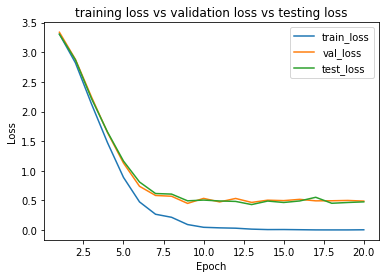

In [13]:
plt.plot(np.arange(20)+1,training_loss,label="train_loss")
plt.plot(np.arange(20)+1,validation_loss,label="val_loss")
plt.plot(np.arange(20)+1,testing_loss,label="test_loss")

plt.title("training loss vs validation loss vs testing loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

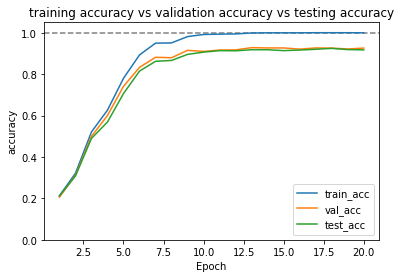

In [14]:
plt.axhline(y=1, color="black", linestyle="--", alpha=0.5)
plt.plot(np.arange(20)+1,training_accuracy,label="train_acc")
plt.plot(np.arange(20)+1,validation_accuracy,label="val_acc")
plt.plot(np.arange(20)+1,testing_accuracy,label="test_acc")

plt.title("training accuracy vs validation accuracy vs testing accuracy")
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim(0,1.05)
plt.legend()
plt.show()